<a href="https://colab.research.google.com/github/Mohon127/Digital_Image_Processing/blob/main/spatial_filtering_homework_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

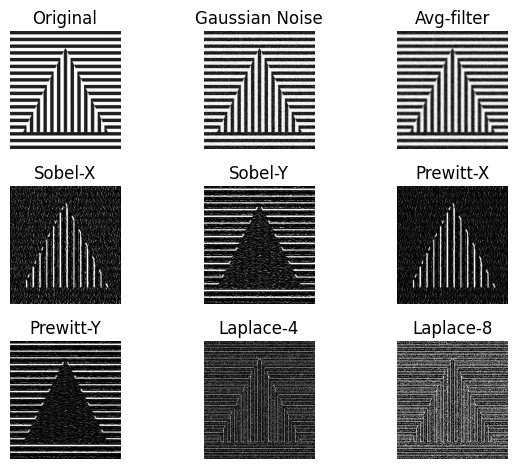

In [18]:
"""
Problem statement:
    Load an image, add Gaussian noise using np.random.normal,
    then apply only horizontal edge detection using Sobel-X,
    Prewitt-X, and Scharr-X filters with cv2.filter2D.
"""

#==============  Import required libraries =================================
import matplotlib.pyplot as plt
import cv2
import numpy as np


def main():
    #============= Read the image in grayscale (0 flag = grayscale) =========
    img_gray = cv2.imread("/content/rgb16.png", 0)

    #============= Add Gaussian noise (manual way) ==========================
    row, col = img_gray.shape
    mean = 0
    var = 0.01
    sigma = var ** 0.5
    gauss = np.random.normal(mean, sigma, (row, col))
    noisy_img = img_gray + gauss * 255   # scale noise
    noisy_img = np.clip(noisy_img, 0, 255).astype(np.uint8)

    #============= Define HORIZONTAL kernels ================================

    avg_fiter = np.array([[1/9, 1/9, 1/9],
                          [1/9, 1/9, 1/9],
                          [1/9, 1/9, 1/9]])


    sobel_x = np.array([[-1, 0, 1],
                        [-2, 0, 2],
                        [-1, 0, 1]])

    sobel_y = np.array([[-1, -2, -1],
                        [0,  0,  0],
                        [1,  2,  1]])

    prewitt_x = np.array([[-1, 0, 1],
                          [-1, 0, 1],
                          [-1, 0, 1]])

    prewitt_y = np.array([[-1, -1, -1],
                          [ 0,  0,  0],
                          [ 1,  1,  1]])

    laplace_4 = np.array([[ 0, -1,  0],
                          [-1,  4, -1],
                          [ 0, -1,  0]])

    laplace_8 = np.array([[-1, -1, -1],
                          [-1,  8, -1],
                          [-1, -1, -1]])


    #============= Apply filters using cv2.filter2D =========================
    avg = cv2.filter2D(noisy_img, -1, avg_fiter)

    sobel_x = cv2.filter2D(noisy_img, -1, sobel_x)
    sobel_y = cv2.filter2D(noisy_img, -1, sobel_y)

    prewitt_x = cv2.filter2D(noisy_img, -1, prewitt_x)
    prewitt_y = cv2.filter2D(noisy_img, -1, prewitt_y)

    laplace_4 = cv2.filter2D(noisy_img, -1, laplace_4)
    laplace_8 = cv2.filter2D(noisy_img, -1, laplace_8)


    #============= Collect images for display ===============================
    img_set = [img_gray, noisy_img, avg, sobel_x, sobel_y, prewitt_x, prewitt_y, laplace_4, laplace_8]
    img_title = ['Original', 'Gaussian Noise', 'Avg-filter','Sobel-X','Sobel-Y', 'Prewitt-X', 'Prewitt-Y', 'Laplace-4', 'Laplace-8']

    #============= Display ==================================================
    display(img_set, img_title)


#====================  function to display all image ========================
def display(img_set, img_title):

    for i in range(len(img_set)):
        plt.subplot(3, 3, i + 1)
        plt.imshow(img_set[i], cmap='gray')
        plt.title(img_title[i])
        plt.axis('off')

    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    main()
